In [4]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
from numpy.random import choice

In [5]:
num_iters = 0

In [41]:
probabilities = np.zeros((40,40))

In [138]:
excluded = randint(2,4)
excluded

3

In [139]:
count_not_present = 0
num_iters = 0
for _ in range(100000):
    for i in range(4):
        if i == excluded:
            continue
        if i == 0:
            x = randint(4, 16)
            y = randint(4, 16)
            if abs(10-x) > 2 or abs(10 - y) > 2:
                count_not_present += 1
        elif i == 1:
            x = randint(24, 36)
            y = randint(4, 16)
            if abs(30-x) > 2 or abs(10 - y) > 2:
                count_not_present += 1
        elif i == 2:
            x = randint(4, 16)
            y = randint(24, 36)
            if abs(10-x) > 2 or abs(30 - y) > 2:
                count_not_present += 1
        else:
            x = randint(24, 36)
            y = randint(24, 36)
            if abs(30-x) > 2 or abs(30 - y) > 2:
                count_not_present += 1
        # print(x,y)
        probabilities[x-3:x+2,y-3:y+2] += np.ones((5,5))
        # probabilities[x-1][y-1] += 1
        # probabilities[x-2][y-1] += 1
        # probabilities[x][y-1] += 1
        # probabilities[x-1][y-2] += 1
        # probabilities[x-1][y] += 1
        # probabilities[x-2][y] += 1
        # probabilities[x-2][y-2] += 1
        # probabilities[x][y] += 1
        # probabilities[x][y-2] += 1
        num_iters += 1

In [90]:
probabilities /= num_iters

In [91]:
print(num_iters)

300000


In [92]:
print(count_not_present/num_iters)

0.8513966666666667


In [93]:
print(probabilities)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00188667 0.         0.        ]
 [0.         0.         0.         ... 0.00395333 0.         0.        ]
 ...
 [0.         0.00188    0.00391667 ... 0.00202667 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [94]:
print(np.amax(probabilities))

0.05016006010021822


In [86]:
print(probabilities[32:35,6:9])

[[0.0178934  0.01795007 0.0181534 ]
 [0.01778007 0.01796007 0.0180434 ]
 [0.0179334  0.01779007 0.01768673]]


In [97]:
print(probabilities.argmax())

1312


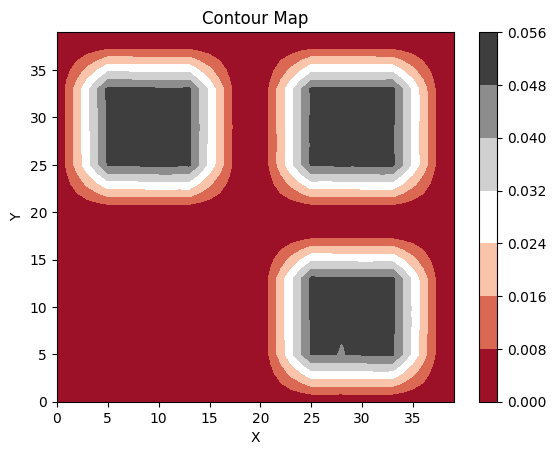

In [96]:
fig, ax = plt.subplots()
contour = ax.contourf(probabilities, cmap='RdGy')

cbar = fig.colorbar(contour)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contour Map')

# Show the plot
plt.show()


In [6]:
rewards = np.ones((40,40)) * 5

In [7]:
print(rewards)

[[5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 ...
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]]


In [92]:
def set_rewards():
    result = np.ones((40,40))*5
    excluded = randint(1,3)
    for i in range(4):
        if i == excluded:
            continue
        if i == 0:
            x = randint(4, 16)
            y = randint(4, 16)
        elif i == 1:
            x = randint(24, 36)
            y = randint(4, 16)
        elif i == 2:
            x = randint(4, 16)
            y = randint(24, 36)
        else:
            x = randint(24, 36)
            y = randint(24, 36)
        # print(x,y)
        result[x-2:x+1,y-2:y+1] = np.ones((3,3)) * 1000
    return result

In [9]:
# mdp = state: [action: probability for action]
mdp = {
    (x, y): [1,1,1,1] for x in range(40)
    for y in range(40)
}
for state, actions in mdp.items():
    if state[0] + 1 >= 40:
        actions[0] = 0
    if state[0] - 1 < 0:
        actions[1] = 0
    if state[1] + 1 >= 40:
        actions[2] = 0
    if state[1] < 1:
        actions[3] = 0
    action_sum = sum(actions)
    for i in range(4):
        actions[i] /= action_sum

In [51]:
class Player():
    def __init__(self):
        self.position = [0, 0]
        self.can_move = True
        print(self.position)
        self.mdp = {(x, y): [] for x in range(40) for y in range(40)}
        for state, actions in self.mdp.items():
            if state[0] + 1 < 40:
                actions.append((2,1))
            else:
                actions.append((0,0))
            if state[0] >= 1:
                actions.append((2,1))
            else:
                actions.append((0,0))
            if state[1] + 1 < 40:
                actions.append((2,1))
            else:
                actions.append((0,0))
            if state[1] > 0:
                actions.append((2,1))
            else:
                actions.append((0,0))
            actions = np.array(actions, dtype=np.float64)
            self.mdp[state] = actions

In [11]:
gamma = 0.9
epsilon = 0.1
players = []
for _ in range(8):
    player = Player()
    players.append(player)

[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]


In [12]:
players[0].mdp

{(0,
  0): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [0., 0.]]),
 (0,
  1): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  2): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  3): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  4): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  5): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  6): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  7): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  8): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  9): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  10): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  11): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6

In [13]:
excluded = randint(2, 4)
excluded

2

In [14]:
for i in range(4):
    if i == excluded:
        continue
    if i == 0:
        x = randint(4, 16)
        y = randint(4, 16)
    elif i == 1:
        x = randint(24, 36)
        y = randint(4, 16)
    elif i == 2:
        x = randint(4, 16)
        y = randint(24, 36)
    else:
        x = randint(24, 36)
        y = randint(24, 36)
    rewards[x-2:x+1,y-2:y+1] += np.ones((3,3)) * 995

In [123]:
players = []
for _ in range(8):
    player = Player()
    players.append(player)

[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]


In [124]:
def game():
    states_and_actions = [[],[],[],[],[],[],[],[]]
    gamma = 0.92
    rewards = set_rewards()
    reward = 0
    for player in players:
        player.position = [0,0]
    print("Starting Game")
    num_moves = 0
    while any([player.can_move for player in players]) and num_moves < 10000:
        gamma *= 0.92
        num_moves += 1
        for i in range(8):
            player = players[i]
            x = player.position[0]
            y = player.position[1]
            if not player.can_move:
                continue
            new_list = np.array([val[0] for val in player.mdp[(x,y)]])
            new_list = new_list / np.sum(new_list)
            movement = choice(range(1, 5), p=new_list)
            if x > 0 and rewards[x-1][y] == 1000:
                movement = 2
            elif x < 39 and rewards[x+1][y] == 1000:
                movement = 1
            elif y > 0 and rewards[x][y-1] == 1000:
                movement = 4
            elif y < 39 and rewards[x][y+1] == 1000:
                movement = 3
            elif x < 39 and y < 39 and rewards[x+1][y+1] == 1000:
                movement = choice([1,3])
            elif x < 39 and y > 0 and rewards[x+1][y-1] == 1000:
                movement = choice([1,4])
            elif x > 0 and y > 0 and rewards[x-1][y-1] == 1000:
                movement = choice([2,4])
            elif x > 0 and y < 39 and rewards[x-1][y+1] == 1000:
                movement = choice([2,3])
            states_and_actions[i].append(((player.position[0], player.position[1]), movement-1))
            if movement == 1:
                player.position[0] += 1
            elif movement == 2:
                player.position[0] -= 1
            elif movement == 3:
                player.position[1] += 1
            else:
                player.position[1] -= 1
            reward += rewards[player.position[0], player.position[1]] * gamma
            if rewards[player.position[0], player.position[1]] == 1000:
                print(num_moves)
                # player.can_move = False
                rewards[player.position[0] - 2:player.position[0] + 3, player.position[1] - 2:player.position[1] + 3] = np.minimum(rewards[player.position[0] - 2:player.position[0] + 3, player.position[1] - 2:player.position[1] + 3], 5)
            rewards[player.position[0], player.position[1]] = 0
    for i in range(8):
        given_rew = reward/1000
        player = players[i]
        for state_action in states_and_actions[i][::-1]:
            Q = player.mdp[state_action[0]][state_action[1]][0]
            n = player.mdp[state_action[0]][state_action[1]][1]
            player.mdp[state_action[0]][state_action[1]][0] = (Q * n + given_rew)/(n+1)
            player.mdp[state_action[0]][state_action[1]][1] += 1
            given_rew *= gamma
    return reward

In [125]:
returned_rewards = []
for play in range(100):
    returned_rewards.append(game())

Starting Game
33
304
797
Starting Game
35
563
838
Starting Game
5
446
704
Starting Game
71
123
250
Starting Game
47
310
1062
Starting Game
25
1013
1086
Starting Game
159
513
1029
Starting Game
26
276
1348
Starting Game
36
427
1060
Starting Game
22
270
1218
Starting Game
70
365
499
Starting Game
15
625
1266
Starting Game
44
168
616
Starting Game
98
344
1951
Starting Game
268
496
740
Starting Game
60
346
1252
Starting Game
97
161
546
Starting Game
15
449
590
Starting Game
106
654
1142
Starting Game
43
304
2614
Starting Game
33
255
1035
Starting Game
31
153
283
Starting Game
90
1232
1584
Starting Game
102
433
1219
Starting Game
58
387
416
Starting Game
60
126
791
Starting Game
75
344
1189
Starting Game
182
605
696
Starting Game
158
217
501
Starting Game
66
754
1401
Starting Game
31
624
704
Starting Game
32
365
679
Starting Game
116
167
322
Starting Game
13
517
1241
Starting Game
62
498
1182
Starting Game
171
374
883
Starting Game
48
174
502
Starting Game
79
330
929
Starting Game
40
455
49

In [121]:
np.mean(returned_rewards[74:]) - np.mean(returned_rewards[:24])

31.150468422380072

In [90]:
for player in players:
    for row in player.mdp:
        print(row)
    break

{(0,
  0): array([[32.21230769, 13.        ],
        [ 0.        ,  0.        ],
        [31.457     , 10.        ],
        [ 0.        ,  0.        ]]),
 (0,
  1): array([[30.05428571,  7.        ],
        [ 0.        ,  0.        ],
        [32.21230769, 13.        ],
        [31.457     , 10.        ]]),
 (0,
  2): array([[28.184     ,  5.        ],
        [ 0.        ,  0.        ],
        [31.75454545, 11.        ],
        [31.09333333,  9.        ]]),
 (0,
  3): array([[28.184     ,  5.        ],
        [ 0.        ,  0.        ],
        [30.05428571,  7.        ],
        [29.275     ,  6.        ]]),
 (0,
  4): array([[32.80470588, 17.        ],
        [ 0.        ,  0.        ],
        [32.80470588, 17.        ],
        [ 2.        ,  1.        ]]),
 (0,
  5): array([[32.684375  , 16.        ],
        [ 0.        ,  0.        ],
        [32.39214286, 14.        ],
        [32.684375  , 16.        ]]),
 (0,
  6): array([[32.548     , 15.        ],
        [ 0.      

In [249]:
states_and_actions

[[], [], [], [], [], [], [], []]

In [314]:
players[1].mdp

{(0,
  0): array([[ 4.61416667, 12.        ],
        [ 0.        ,  0.        ],
        [ 4.75777778,  9.        ],
        [ 0.        ,  0.        ]]),
 (0,
  1): array([[ 4.6055, 10.    ],
        [ 0.    ,  0.    ],
        [ 5.1335, 10.    ],
        [ 4.36  ,  8.    ]]),
 (0,
  2): array([[ 5.3755    , 10.        ],
        [ 0.        ,  0.        ],
        [ 4.74363636, 11.        ],
        [ 4.5075    ,  8.        ]]),
 (0,
  3): array([[4.235     , 9.        ],
        [0.        , 0.        ],
        [5.87888889, 9.        ],
        [4.583125  , 8.        ]]),
 (0,
  4): array([[6.23944444, 9.        ],
        [0.        , 0.        ],
        [6.        , 1.        ],
        [5.53      , 4.        ]]),
 (0,
  5): array([[6., 1.],
        [0., 0.],
        [6., 1.],
        [6., 1.]]),
 (0,
  6): array([[5.80833333, 3.        ],
        [0.        , 0.        ],
        [5.53      , 4.        ],
        [6.        , 1.        ]]),
 (0,
  7): array([[4.82642857, 7.   

In [278]:
players[1].mdp[(0,0)][0][0]

13

In [259]:
arr = set_rewards()

In [262]:
np.amax(arr)

1005.0